# Optimum Inference with OpenVINO™

Optimum Intel can be used to load optimized models from HuggingFace Hub and create pipelines to inference with OpenVINO™  Runtime without rewriting your APIs

### Transformers Model
You can now easily perform inference with OpenVINO™  Runtime on a variety of Intel® processors. For that, just replace the **AutoModelForXxx** class with the corresponding **OVModelForXxx** class.

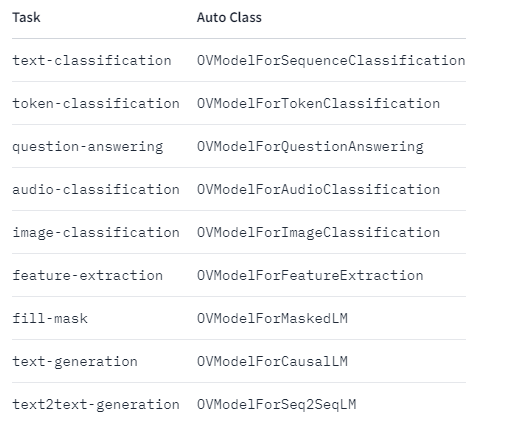




### Import Libraries

In [ ]:
from optimum.intel import OVModelForCausalLM
from transformers import AutoTokenizer

In [ ]:
model_path = "./outputs/own-merged-llm"
model = OVModelForCausalLM.from_pretrained(model_path, export=False)
tokenizer = AutoTokenizer.from_pretrained(model_path)

In [ ]:
import ipywidgets as widgets
input_prompt = widgets.Text(
    value='Did you encounter an error message saying "Legacy-Install-Failure" when installing the Openvino-Dev pip package using Python 3.10?',
    placeholder='Type something',
    description='Question:',
    disabled=False,
    layout=widgets.Layout(width="90%")
)
input_prompt

### Run Inferencing

In [ ]:
CUSTOM_PROMPT = "### Question: {prompt} ### Answer:"
prompt = CUSTOM_PROMPT.format(prompt=input_prompt.value)
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, temperature=0.3, do_sample=True, max_new_tokens=32, use_cache=True)
# output = output.cpu()
output_str = tokenizer.decode(output[0], skip_special_tokens=True)
print('-'*20, 'Output', '-'*20)
print(output_str)

## Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation. 

No product or component can be absolutely secure.  

Your costs and results may vary.  

No license (express or implied, by estoppel or otherwise) to any intellectual property rights is granted by this document, with the sole exception that code included in this document is licensed subject to the Zero-Clause BSD open source license (0BSD), Open Source Initiative. No rights are granted to create modifications or derivatives of this document. 

© Intel Corporation.  Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries.  Other names and brands may be claimed as the property of others.  